In [31]:
%matplotlib inline

import importlib
import numpy as np
import pr_util as util

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from generate_global_features_2 import generate_global_features

importlib.reload(util)

<module 'pr_util' from '/Users/felipefelix/USP/tcc/code/pr_util.py'>

In [49]:
# Randomly select n species from dataset

n = 5
data_dirs = util.choose_species(n)

for dir in data_dirs:
    print(dir)

/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Poospiza nigrorufa/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Synallaxis spixi/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Streptoprocne biscutata/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Ramphocelus bresilius/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Muscipipra vetula/


In [18]:
# Generate n_global global features from a selected feature 'feat_name', 
# each one defined by a function in 'functions'.

n_global = 4
feat_name = 'mfcc'
functions = [np.mean, np.std, np.max, np.min]
song_or_call = 'song'

labels_dict, labels, data = generate_global_features(n_global, feat_name, data_dirs, song_or_call, functions)

In [19]:
print(labels_dict)
print(labels)
print(data[:5])

{'Leucochloris Albicollis': 0, 'Ramphodon Naevius': 1, 'Vanellus Chilensis': 3, 'Camptostoma Obsoletum': 2, 'Culicivora Caudacuta': 4}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[[  -2.12373246   45.36199076   74.48487516 -263.35863771]
 [  -6.83072653   67.11631748  151.53610714 -577.67918389]
 [  -8.20541268   57.67190748  165.8581785  -390.25169182]
 [ -20.77015049   93.34113578   79.92093224 -739.34118765]
 [ -22.60952594  105.08643661   71.15376844 -763.84760182]]


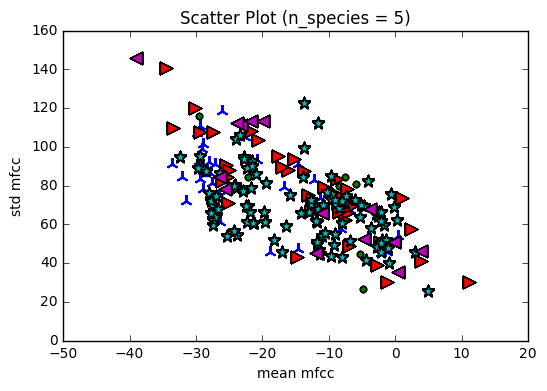

In [20]:
util.plot_scatter(data[:,0], data[:,1], labels, 'mean mfcc', 'std mfcc')

## kNN

In [22]:
util.kNN(data, labels, range(3,10), 5)

3-Neighbors | Accuracy: 0.48 (+/- 0.19) | Weight: uniform
3-Neighbors | Accuracy: 0.54 (+/- 0.17) | Weight: distance
4-Neighbors | Accuracy: 0.49 (+/- 0.15) | Weight: uniform
4-Neighbors | Accuracy: 0.55 (+/- 0.08) | Weight: distance
5-Neighbors | Accuracy: 0.56 (+/- 0.09) | Weight: uniform
5-Neighbors | Accuracy: 0.59 (+/- 0.12) | Weight: distance
6-Neighbors | Accuracy: 0.59 (+/- 0.13) | Weight: uniform
6-Neighbors | Accuracy: 0.61 (+/- 0.09) | Weight: distance
7-Neighbors | Accuracy: 0.59 (+/- 0.09) | Weight: uniform
7-Neighbors | Accuracy: 0.61 (+/- 0.09) | Weight: distance
8-Neighbors | Accuracy: 0.60 (+/- 0.08) | Weight: uniform
8-Neighbors | Accuracy: 0.60 (+/- 0.05) | Weight: distance
9-Neighbors | Accuracy: 0.61 (+/- 0.05) | Weight: uniform
9-Neighbors | Accuracy: 0.61 (+/- 0.08) | Weight: distance


## Naïve-Bayes

In [29]:
gnb = GaussianNB()
scores = cross_val_score(gnb, data, labels, cv = 5)
print(scores)

[ 0.55813953  0.54761905  0.56097561  0.65        0.57894737]


## SVM

In [30]:
clf = svm.SVC(kernel = 'linear', C = 1)
scores = cross_val_score(clf, data, labels, cv = 5)
print(scores)

[ 0.58139535  0.52380952  0.53658537  0.525       0.57894737]
